### Examples involving Work and Energy

The notebook contains examples using work and energy both symbolically and numerically. 

#### Example Work done by constant Force

In this example $\Delta\vec r$ is the displacement and $\vec F$ the constant force, here the force of gravity. The object is moved $L$ units to the right, and 
$H$ units upwards.


The work is $W=\vec F\cdot\Delta \vec r$.

To work with symbolic vectors we can use the Matrix class, where we can create a vector with a single array of elements.
Here we need to have a vector represent the force of gravity and a vector representing the displacement.
```python
F = Matrix([0, -m * g]) # force of gravity
dr = Matrix([L, H]) # displacement
```
The work can be computed a dot product between the force and the displacement vectors.
```python
W = F.dot(dr) # compute the work with a dot product
```



In [1]:
from sympy import symbols,Matrix
L,H = symbols('L,H')
dr = Matrix([L,H]) # vector representing displacement of object
m,g = symbols('m,g') # mass and acceleration of gravity
F = Matrix([0, -m * g]) # force of gravity
display('dr',dr)
display('F',F)
W = F.dot(dr) # compute the work with a dot product
display('Work',W)
print('Work = {:.2f} J'.format(W.subs({H:2.5, g:9.82, m:0.45}))) # inserting values if known

'dr'

Matrix([
[L],
[H]])

'F'

Matrix([
[   0],
[-g*m]])

'Work'

-H*g*m

Work = -11.05 J


#### Example Work done by varying Force in 1D

Let us look at an example of a piecewise linear force function, $F(x)$, that depends on the position.
Note that the function is vectorized as there are conditionals that do not work for arrays. 

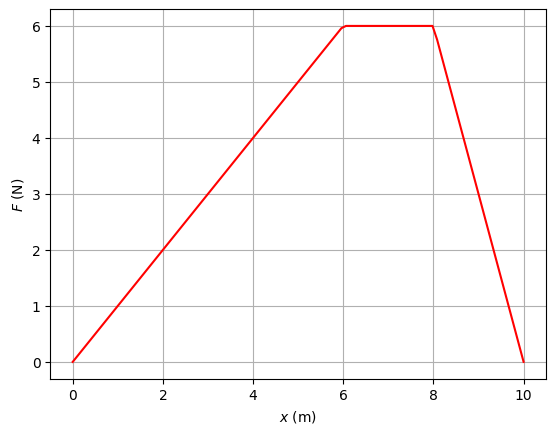

In [2]:
import numpy as np
def F(x):
    if x < 6:
        return x
    elif x < 8:
        return 6
    else:
        return 6-3*(x-8)
x = np.linspace(0,10,100)
F = np.vectorize(F) # necessary since x < 6 doesn't make sense when x is a vector of numbers
F = F(x)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,F,'r-')
plt.xlabel('$x$ (m)')
plt.ylabel('$F$ (N)')
plt.grid()
plt.show()

We now compute the value of the integral, the work done by the force when an object moves from $0$ to $10$.
We use the method trapezoid from the scipy.integrate package, which employs the trapezoidal rule of numerical integration. 
See the last example in this notebook for more on the trapezoidal rule.

In [3]:
from scipy.integrate import trapezoid
W = trapezoid(F,x)
print('Work = {:.2f} J'.format(W))
print(0.5*6*6+2*6+0.5*2*6) # work computed as the area under the curve: two triangles and a rectangle

Work = 36.00 J
36.0


Using a loop we can compute the work from $0$ to $x$ as a function of distance ($x$). 
The graph shows the work done by $F$ from 0 to $x$.

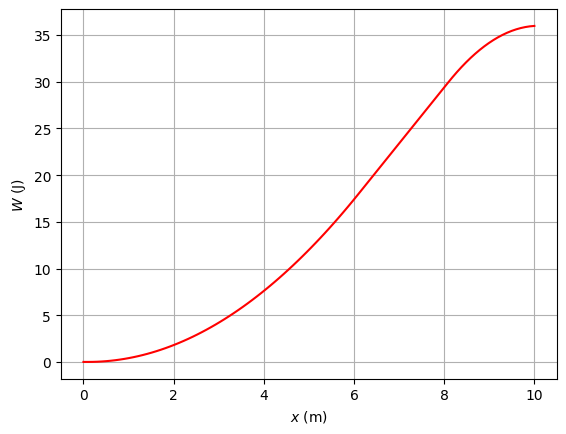

In [4]:
from scipy.integrate import trapezoid
W = []
for i in range(len(x)):   
    W.append(trapezoid(F[0:i],x[0:i]))
plt.figure()
plt.plot(x,W,'r-')
plt.xlabel('$x$ (m)')
plt.ylabel('$W$ (J)')
plt.grid()
plt.show()

Find the kinetic energy of the object after moving $10$ m if the mass of the object is $m=0.45$ kg.
We use the fsolve method from scipy.optimize to compute the speed numerically.
The function f should be zero at the desired value of the speed.

In [5]:
W = trapezoid(F,x)
m = 0.45
from scipy.optimize import fsolve
def f(v):
    return 1/2*m*v**2-W
v = fsolve(f,1.0)
display(v)
print('Work = {:.2f} J'.format(W))
print('v = {:.2f} m/s'.format(v[0]))
print('K = {:.2f} J'.format(1/2*m*v[0]**2))

array([12.64846533])

Work = 36.00 J
v = 12.65 m/s
K = 36.00 J


#### Work along a general path
The work done by a force, $\vec F$, along a curve is
$$W=\int \vec F\cdot d\vec r$$
The definition of velocity is
$$\frac{d\vec r}{dt}=\vec v $$
from which we can write
$$d\vec r=\vec v dt$$
Using this we can integrate in time instead of in space.
$$W=\int \vec F\cdot \vec v dt$$
We can start by defining the path along which we want to integrate.
Here we use a straight line between the two points: $\vec r_0=(0,0)$ and $\vec r_1=(10,20)$.
The straight line can be parameterized by $\vec r(t)=(1-t)\vec r_0+t\vec r_1,\ t\in[0,1]$. 
We get $\vec r(t)=(10t,20t)$. We differentiate to get the velocity
$\vec v(t)=(10,20)$.
If the force is the force of gravity we have $\vec F=(0,-mg)$.

In the code below we first define symbols, then the x- and y-coordinates of the path, then the time interval for the motion,
then the position vector, force vector, and the velocity vector we will use in integration.
```python
m, g = symbols('m g') # mass and acceleration of gravity
t = symbols('t') # represents time
x = 10 * t # x-coordinate of path
y = 20 * t # y-coordinate of path
T = np.linspace(0,1,100) # the parameterization of time
r = (x, y) # vector representing positon of object
F = (0, -m * g) # force of gravity
v = (diff(x,t), diff(y,t)) # velocity of object
```


##### Work done by the force of gravity along straight line

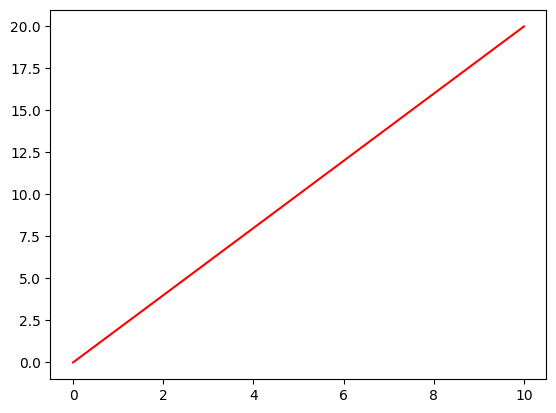

-20*g*m

In [6]:
import numpy as np
from sympy import symbols,diff,integrate
m, g = symbols('m g') # mass and acceleration of gravity
t = symbols('t') # represents time
x = 10 * t # x-coordinate of path
y = 20 * t # y-coordinate of path
import matplotlib.pyplot as plt # we plot the path
T = np.linspace(0,1,100)
plt.figure()
plt.plot(10*T,20*T,'r-')
plt.show()
r = Matrix([x, y]) # vector representing positon of object
F = Matrix([0, -m * g]) # force of gravity
v = r.diff(t) # velocity of object
work = integrate(F.dot(v), (t, 0, 1)) # work computed as integral of dot product
display(work)

##### Work done by force of gravity along parabola

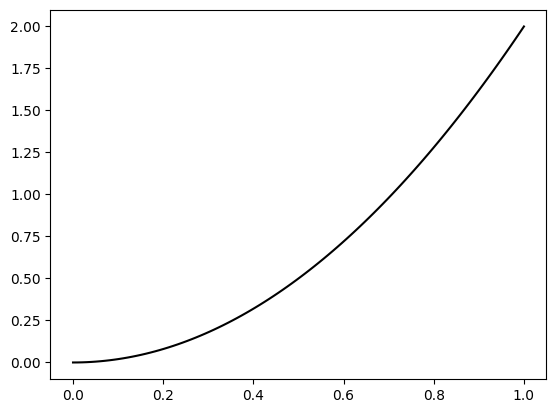

'r'

Matrix([
[     t],
[2*t**2]])

'v'

Matrix([
[  1],
[4*t]])

'F'

Matrix([
[   0],
[-g*m]])

-4*g*m*t

'W'

-2*g*m

In [7]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
T = np.linspace(0,1,100)
plt.figure()
plt.plot(T,2*T**2,'k-')
plt.show()
m,g,t = symbols('m,g,t')
x = t
y = 2*t**2
r = Matrix([x,y])
display('r',r)
v = r.diff(t)
display('v',v)
F = Matrix([0,-m*g])
display('F',F)
display(F.dot(v))
W = integrate(F.dot(v),(t,0,1))
display('W',W)

#### Work-Energy theorem spring force
An object of mass $m=0.45 k\text{g}$ moves towards a spring with velocity $v=5.0 \text{m/s}$. The spring has the spring constant, $k=10.0$ N/m.

What is the maximum compression of the spring?

At the point of largest compression, the velocity is zero, hence the work energy theorem becomes: $W_{\text{spring}}=0-\frac{1}{2}mv^2$.

$W_{\text{spring}}=\frac{1}{2}k0^2-\frac{1}{2}kx^2$

This gives the equation
$\frac{1}{2}k0^2-\frac{1}{2}kx^2=0-\frac{1}{2}mv^2$.

In [8]:
import sympy as sp
m,k,v,x = sp.symbols('m,k,v,x',positive=True)
eq = sp.Eq(0-sp.Rational(1,2)*k*x**2,0-sp.Rational(1,2)*m*v**2)
display(eq)
sol = sp.solve(eq,x)
display(sol)
display(sol[0])

Eq(-k*x**2/2, -m*v**2/2)

[sqrt(m)*v/sqrt(k)]

sqrt(m)*v/sqrt(k)

#### Work-Energy theorem with force of gravity and spring force
An object of mass $m$ hangs at the end of a spring with spring constant, $k=10.0$ N/m. 
The system is released from rest.

The figure below shows the initial state.

What is the length of the spring when the object is at its lowest point?

At the lowest point, the velocity is zero, hence the work energy theorem becomes: $W_{\text{gravity}}+W_{\text{spring}}=0$.


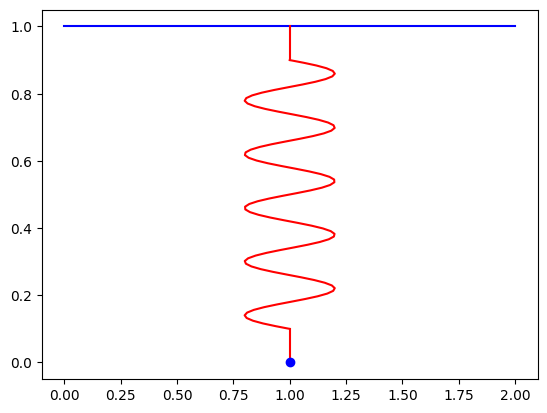

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0,2],[1+0,1+0],'b-')
plt.plot([1,1],[1,0.9],'r-')
plt.plot([1,1],[0.1,0],'r-')
plt.plot(1,1-1,'bo')
t = np.linspace(0,1,100)
T = np.linspace(0.1,0.9,100)
plt.plot(1+0.2*np.sin(10*np.pi*t),1-T,'r-')
plt.show()

At the lowest point, $y=-h<0$, the velocity is zero, hence the work energy theorem becomes: $W_{\text{gravity}}+W_{\text{spring}}=0$.

$W_{\text{gravity}}=mgh$

$W_{\text{spring}}=\frac{1}{2}k0^2-\frac{1}{2}kh^2$

In [10]:
import sympy as sp
m,g,k,l,h = sp.symbols('m,g,k,l,h')
eq = sp.Eq(m*g*h-sp.Rational(1,2)*k*h**2,0)
display(eq)
sol = sp.solve(eq,h)
display(sol)
display(sol[0])
display(sol[1])

Eq(g*h*m - h**2*k/2, 0)

[0, 2*g*m/k]

0

2*g*m/k

The position we want is then $y=\frac{-2mg}{k}$.
Below we show the motion of the object as a function of time
by solve the equations of motion.

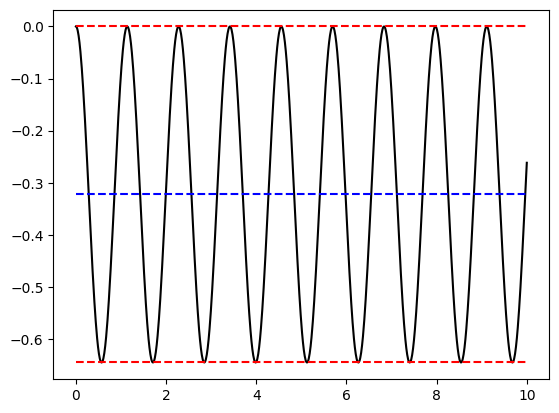

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
g = 9.82
m = 0.345
k = 10.5
l = 1.0
def f(t,z):
    y,v = z
    dydt = v
    dvdt = (-m*g-k*y)/m
    return [dydt,dvdt]
t = np.linspace(0,10,1000)
sol = solve_ivp(f,[t[0],t[-1]],t_eval=t,y0=[0,0],atol=1e-8,rtol=1e-8)
plt.figure()
plt.plot(t,sol.y[0],'k-')
#plt.plot([t[0],t[-1]],[0,0],'r--')
#plt.plot([t[0],t[-1]],[-2*m*g/k,-2*m*g/k],'r--')
#plt.plot([t[0],t[-1]],[0,0],'r--')
plt.plot([t[0],t[-1]],[0,0],'r--')
plt.plot([t[0],t[-1]],[-m*g/k,-m*g/k],'b--')
plt.plot([t[0],t[-1]],[-2*m*g/k,-2*m*g/k],'r--')
plt.show()

#### Numerical integration with the trapezoidal rule

In the following we will use the method trapezoid from the scipy.integrate package to compute numerical approximations to the integral of the function $x=1+\frac{5}{3}t-\frac{2}{3}t^2$.

The approximation method is called the trapezoidal rule, and it takes a number of points $(t,x)$ on the graph of the function and connects these points with straight lines. 
This can be seen below where the function is drawn together with four sampled points.
The approximation is then to sum up the areas of the trapezoids (red dashed lines).

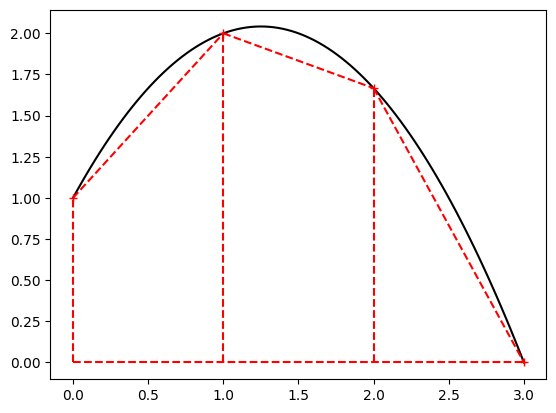

In [12]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0,3,100)
x = 1+5/3*t-2/3*t**2
T = np.linspace(0,3,4)
y = 1+5/3*T-2/3*T**2
plt.figure()
plt.plot(t,x,'k-')
plt.plot(T,y,'r+')
for i,u in enumerate(T):
    plt.plot([u,u],[0,y[i]],'r--')
for i in range(len(T[:-1])):
    plt.plot([T[i],T[i+1]],[y[i],y[i+1]],'r--')
plt.plot([0,3],[0,0],'r--')
plt.show()

Next we compute the value of the integral approximation with the four point (this is obviously very few point, we will compute
it with more points further below).

In [13]:
from scipy.integrate import trapezoid
print('trapezoid method returns ',trapezoid(y,T))
print('Manuel integration yields',1.5+1+5/3) # manual integration results by computing the areas of the trapezoids.

trapezoid method returns  4.166666666666668
Manuel integration yields 4.166666666666667


Below we compute the area with the trapezoidal rule for 10, 100, 1000, 10000, 100000, and 1000000 points.
The value seems to converge to 4.5 or 9/2.

In [14]:
for i in range(1,7):
    t = np.linspace(0,3,10**i)
    x = 1+5/3*t-2/3*t**2
    print('{:7d} {:.10f}'.format(10**i,trapezoid(x,t)))

     10 4.4629629630
    100 4.4996939088
   1000 4.4999969940
  10000 4.4999999700
 100000 4.4999999997
1000000 4.5000000000


The analytical solution is computed below together with the symbolic integral.

In [15]:
from sympy import symbols, Rational, integrate
t = symbols('t')
x = 1+Rational(5,3)*t-Rational(2,3)*t**2
i = integrate(x,(t,0,3))
print('The value of the integral is',i)
display(integrate(x,t))

The value of the integral is 9/2


-2*t**3/9 + 5*t**2/6 + t

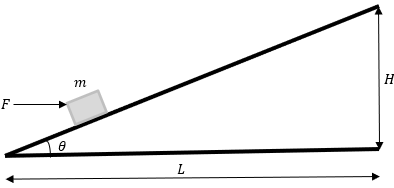

In [4]:
from sympy import symbols,Matrix,sin,cos,Rational,solve
import sympy as sp
theta = sp.symbols('theta')
e_x = Matrix([1,0])
e_y = Matrix([0,1])
e_u = Matrix([cos(theta),sin(theta)])
e_v = Matrix([-sin(theta),cos(theta)])
m,g,F,n,a = sp.symbols('m,g,F,n,a')
Push = Matrix([F, 0])
Weight = Matrix([0, -m * g])
Normal = n*e_v
Sum_F = Push + Weight + Normal
eq_u = sp.Eq(m*a,Sum_F.dot(e_u))
eq_v = sp.Eq(Sum_F.dot(e_v),0)
print('Equations')
display(eq_u)
display(eq_v)
sol = solve([eq_u,eq_v],[a,n])
print('Acceleration')
display(sol[a])
print('Normal force')
display(sol[n])
display(sol[n].simplify())

Equations


Eq(a*m, (F - n*sin(theta))*cos(theta) + (-g*m + n*cos(theta))*sin(theta))

Eq(-(F - n*sin(theta))*sin(theta) + (-g*m + n*cos(theta))*cos(theta), 0)

Acceleration


F*cos(theta)/m - g*sin(theta)

Normal force


F*sin(theta)/(sin(theta)**2 + cos(theta)**2) + g*m*cos(theta)/(sin(theta)**2 + cos(theta)**2)

F*sin(theta) + g*m*cos(theta)

In [7]:
eq_x = sp.Eq(m*a*e_u.dot(e_x),Sum_F.dot(e_x))
eq_y = sp.Eq(m*a*e_u.dot(e_y),Sum_F.dot(e_y))
print('Equations')
display(eq_x)
display(eq_y)
sol = solve([eq_x,eq_y],[a,n])
print('Acceleration')
display(sol[a])
display(sol[a].simplify())
print('Normal force')
display(sol[n])
display(sol[n].simplify())

Equations


Eq(a*m*cos(theta), F - n*sin(theta))

Eq(a*m*sin(theta), -g*m + n*cos(theta))

Acceleration


F*cos(theta)/(m*sin(theta)**2 + m*cos(theta)**2) - g*m*sin(theta)/(m*sin(theta)**2 + m*cos(theta)**2)

F*cos(theta)/m - g*sin(theta)

Normal force


F*sin(theta)/(sin(theta)**2 + cos(theta)**2) + g*m*cos(theta)/(sin(theta)**2 + cos(theta)**2)

F*sin(theta) + g*m*cos(theta)

In [21]:
from sympy import symbols,Matrix,sin,cos,Rational,solve
import sympy as sp
a,a_parallel,a_normal,m,g,F,v,theta,a,N = symbols('a,a_parallel,a_normal,m,g,F,v,theta,a,N',positive=True)
e_parallel = Matrix([cos(theta),sin(theta)])
e_normal = Matrix([-sin(theta),cos(theta)])
Push = Matrix([F, 0])
Weight = Matrix([0, -m * g])
Normal = N*e_normal
Sum_F = Push + Weight + Normal
eq_parallel = sp.Eq(m*a,Sum_F.dot(e_parallel))
eq_normal = sp.Eq(Sum_F.dot(e_normal),0)
print('Equations')
display(eq_parallel)
display(eq_normal)
sol = solve([eq_parallel,eq_normal],[a,N])
print('Acceleration')
display(sol[a])
print('Normal force')
display(sol[N].simplify())
a_x,a_y,e_x,e_y = symbols('a_x,a_y,e_x,e_y',positive=True)
e_x = Matrix([1,0])
e_y = Matrix([0,1])
eq_horizontal = sp.Eq(m*a*cos(theta),Sum_F.dot(e_x))
eq_vertical = sp.Eq(m*a*sin(theta),Sum_F.dot(e_y))
print('Equations')
display(eq_horizontal)
display(eq_vertical)
sol = solve([eq_horizontal,eq_vertical],[a,N])
print('Acceleration')
display(sol[a].simplify())
print('Normal force')
display(sol[N].simplify())


Equations


Eq(a*m, (F - N*sin(theta))*cos(theta) + (N*cos(theta) - g*m)*sin(theta))

Eq(-(F - N*sin(theta))*sin(theta) + (N*cos(theta) - g*m)*cos(theta), 0)

Acceleration


F*cos(theta)/m - g*sin(theta)

Normal force


F*sin(theta) + g*m*cos(theta)

Equations


Eq(a*m*cos(theta), F - N*sin(theta))

Eq(a*m*sin(theta), N*cos(theta) - g*m)

Acceleration


F*cos(theta)/m - g*sin(theta)

Normal force


F*sin(theta) + g*m*cos(theta)

In [28]:
from sympy import symbols,Matrix,Rational,solve,Eq
import sympy as sp
m,g,F,W,L,H,v = symbols('m,g,F,W,L,H,v',positive=True)
Push = Matrix([F, 0])
Weight = Matrix([0, -m * g])
Sum_F = Push + Weight
W = Sum_F.dot(Matrix([L,H]))
K = Rational(1,2)*m*v**2
sol = solve(Eq(W,K),v)
print(sol)
display(sol[0])
display(sol[0].simplify())


[sqrt(2*F*L - 2*H*g*m)/sqrt(m)]


sqrt(2*F*L - 2*H*g*m)/sqrt(m)

sqrt(2*F*L - 2*H*g*m)/sqrt(m)

#### Find the spring constant
A box with the mass $m$ is dropped from rest at a height of $h$ above a vertical spring. 
At its lowest position, the box has depressed the spring a distance $d$.
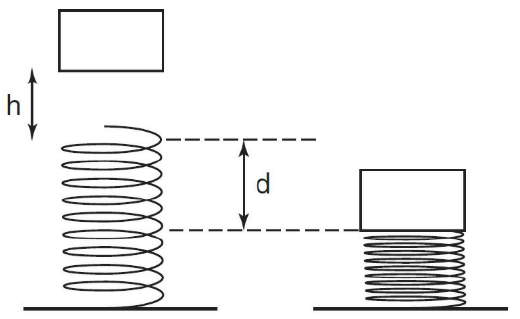

What is the speed of the box just before hitting the spring, and what is the spring constant $k$?

We can apply conservation of mechanical energy to the free fall and the depression of the spring.
We set the gravitational potential energy to zero at the final position (depressed spring).

The equations for the two motions are:

$mg(h+d)=mgd+\frac{1}{2}mv^2$

$mgd+\frac{1}{2}mv^2=\frac{1}{2}kd^2$

In [8]:
from sympy import symbols,Matrix,Rational,Eq,solve
m,g,h,d,k,v = symbols('m,g,h,d,k,v',positive=True)
eq1 = Eq(m*g*h,Rational(1,2)*m*v**2)
eq2 = Eq(Rational(1,2)*m*v**2+m*g*d,Rational(1,2)*k*d**2)
sol = solve([eq1,eq2],[v,k])
print(sol)
display(sol[0][1])

[(sqrt(2)*sqrt(g)*sqrt(h), 2*g*m*(d + h)/d**2)]


2*g*m*(d + h)/d**2